# Computed-Tomography-Myocardium-Image-Segmentation-I

- TEAM_ 7987
- date: 2025-12-06
- baseline訓練 + Ensemble : Private leaderboard：0.820418

- 套件安裝
```bash
pip install --user numpy==1.26.4
pip install --user ray==2.5.0
pip install --user monai==1.2.0
pip install -U ml_collections or pip install --user  ml_collections
pip install --user --no-deps monailabel
pip install --user monai[nibabel, tqdm, einops]
pip install --user scikit-learn
pip install --user scikit-image
pip install --user  shapely
pip install --user  timm
pip install --user tensorboardx ray[tune]
sudo apt-get install zip
```

# ✋以下原baseline安裝略過✋ 
`採用本機安裝因此與baseline環境稍有不同`

In [ ]:
import sys
!{sys.executable} --version
!{sys.executable} -m pip install -U numpy==1.26.4
import os
os._exit(0)

In [ ]:
# Ray 是一個用於擴展 AI 和 Python 應用程式的統一框架。使用 Ray，您可以將同一段程式碼從筆記型電腦無縫擴展到叢集。
#Ray 的設計目標是通用，這意味著它可以有效地運行任何類型的工作負載。如果您的應用程式是用 Python 編寫的，您可以使用 Ray 進行擴展，
#而無需其他基礎架構。

import sys
!{sys.executable} -m pip install -U ray==2.5.0
import ray
print(ray.__version__)

In [ ]:
# MONAI 是一個基於PyTorch 的開源框架，用於醫療成像領域的深度學習，是PyTorch 生態系統的一部分。
# 多維醫學影像資料的靈活預處理；
# 組合式和可移植的 API，可輕鬆整合到現有工作流程中；
# 網路、損失、評估指標等特定領域的實現；
# 可針對不同使用者專業知識進行客製化的設計；
# 多GPU多節點資料並行支援。

import sys
!{sys.executable} -m pip install -U monai==1.2.0
import monai
print(monai.__version__)

In [ ]:
# ml_collections是由Google 發布的一個用於組態管理的Python 庫，它主要用於機器學習實驗中的超參數、組態選項和實驗設定。
# 這個函式庫旨在提供一個清晰、靈活和易於使用的方式來組織和管理配置資訊。
!pip install -U ml_collections

In [ ]:
# pyproject.toml管理py套件生態系使用，這裡只是用來裝"torch>=2.5.1"而已。

# 主機已預裝
# $pip list | grep torch
# pytorch-quantization          2.1.2
# pytorch-triton                3.0.0+989adb9a2
# torch                         2.7.0
# torch-tensorrt                2.4.0a0
# torchvision                   0.22.0


!git clone https://github.com/kairaun/Sam.git

In [ ]:
%cd ./Sam
! ls
! head pyproject.toml
!pip install -e .
import os
os._exit(0)

In [ ]:
# MONAI Label 是一款智慧開源影像標註和學習工具，支援使用者建立標註的資料集，並建立用於臨床評估的 AI 標註模型。 
#MONAI Label 使應用程式開發者能夠以無伺服器的方式建立標註應用，其中自訂標註應用程式透過 MONAI Label Server 以服務形式公開。
#MONAI Label 是一個伺服器-客戶端系統，利用 AI 實現互動式醫學影像註解。它是一個開源且易於安裝的生態系統，
#可以在配備單個或多個 GPU 的機器上本地運行。伺服器和客戶端可以在同一台或不同的機器上工作。它與MONAI 的原理相同。

import sys
!{sys.executable} -m pip install -U --no-deps monailabel
import monailabel
print(monailabel.__version__)

In [ ]:
"""採用本機安裝因此與baseline環境稍有不同"""


# CardiacSegV2/setup.sh 

# sudo apt update && \
# sudo apt install ffmpeg libsm6 libxext6  -y && \
# pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113 && \
# pip install "monai[nibabel, tqdm, einops]==1.2.0" && \
# pip install monailabel==0.7.0 && \
# pip install timm==0.6.13 && \
# pip install tensorboard==2.13.0 && \
# pip install ml-collections==0.1.1 && \
# pip install scikit-learn==1.2.2 && \
# pip install pandas==1.5.3 && \
# pip install matplotlib==3.7.1 && \
# pip install ray==2.4.0 && \
# pip install torchsummaryX==1.3.0 && \
# pip install toml==0.10.2 && \
# pip install gdown==4.7.1 && \
# pip install tabulate==0.9.0 && \
# pip install --user ipykernel && \
# python -m ipykernel install --user --name base

#     gdown==4.6.0 googledrive雲端硬碟


# Clone the project
!git clone https://github.com/kairaun/CardiacSegV2.git

In [ ]:
# Install the Environment
! sudo chmod 700 /content/CardiacSegV2/setup.sh
! /content/CardiacSegV2/setup.sh
! pip install gdown==4.6.0

In [ ]:
# Modify the code
! sed -i '8c \\    os.makedirs(\"/content/CardiacSegV2/\"+data_dir, exist_ok=True)' /content/CardiacSegV2/setup_dir.py
! sed -i '20c \\        os.makedirs(\"/content/CardiacSegV2/\"+model_exp_dir, exist_ok=True)' /content/CardiacSegV2/setup_dir.py
! sed -i '29c \\        os.makedirs("/content/CardiacSegV2/"+model_exp_dir, exist_ok=True)' /content/CardiacSegV2/setup_dir.py
! sed -i '3c sys.path.append(\"/content/CardiacSegV2\")' /content/CardiacSegV2/expers/infer.py
! sed -i '3c sys.path.append(\"/content/CardiacSegV2\")' /content/CardiacSegV2/expers/tune.py
! sed -i '36c ray.init(runtime_env={\"working_dir\": \"/content/CardiacSegV2\"})' /content/CardiacSegV2/expers/tune.py

In [ ]:
! python /content/CardiacSegV2/setup_dir.py

In [ ]:
! python CardiacSegV2/setup_dir.py

In [ ]:
# Modify the code # 改成本地版 不是colab
! sed -i '8c \\    os.makedirs(\"CardiacSegV2/\"+data_dir, exist_ok=True)' CardiacSegV2/setup_dir.py
! sed -i '20c \\        os.makedirs(\"CardiacSegV2/\"+model_exp_dir, exist_ok=True)' CardiacSegV2/setup_dir.py
! sed -i '29c \\        os.makedirs("CardiacSegV2/"+model_exp_dir, exist_ok=True)' CardiacSegV2/setup_dir.py
! sed -i '3c sys.path.append(\"CardiacSegV2\")' CardiacSegV2/expers/infer.py
! sed -i '3c sys.path.append(\"CardiacSegV2\")' CardiacSegV2/expers/tune.py
! sed -i '36c ray.init(runtime_env={\"working_dir\": \"CardiacSegV2\"})' CardiacSegV2/expers/tune.py

In [ ]:
! python CardiacSegV2/setup_dir_local.py

下載訓練資料集

In [ ]:
!ls

In [ ]:
import gdown
import os

gdown.download("https://drive.google.com/u/0/uc?id=1-PrUraWQ38qsSGqZpisvIelR6N8thYld&export=download","/content/CardiacSegV2/dataset/chgh/AICUP_training.zip")
! unzip "/content/CardiacSegV2/dataset/chgh/AICUP_training.zip" -d "/content/CardiacSegV2/dataset/chgh/"

In [ ]:
# Pydantic，主要功能是做資料驗證和資料的解析，讓使用者可以在定義 data model 同時處理資料的驗證和轉換，
# 減少多次來回可能的錯誤並確保 input & output 資料的一致性和有效性


!pip install "pydantic<2.0"

In [ ]:
gdown.download("https://drive.google.com/u/0/uc?id=1uYoYs7pCPhNjn38SXyexUeT5YoocuimR&export=download","/content/CardiacSegV2/exps/data_dicts/chgh/AICUP_training.json")

### K-fold 分配測試

In [ ]:
import numpy as np

numbers = np.arange(1, 51)
k = 5
folds = []
fixed_val = 31  # 不能進train

# 將除了patient00031以外的樣本分成5組
others = [n for n in numbers if n != fixed_val]
val_splits = np.array_split(others, k)

for i in range(k):
    val = list(val_splits[i]) + [fixed_val]
    train = [n for n in numbers if n not in val]
    folds.append({"fold": i+1, "val": val, "train": train})

for f in folds:
    print(f"Fold {f['fold']}:")
    print(f"  val = {f['val']}")
    print(f"  train = {f['train']}")
    print(f"  train size = {len(f['train'])}")
    print()


# 🚵🏻‍♂️ 跑一下環境 🚵🏻‍♂️

In [ ]:
# 設定nb頁面佔滿瀏覽器寬度
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # ex: width:1200px

### 套件

In [ ]:
import sys
import os
import ray
import monai
import monailabel

from tqdm import tqdm

# ⚒️ 設定訓練環境 ⚒️
1. 模型型號
2. 訓練路徑
3. 訓練集[train_K1~train_K5, train_z128_check]

In [ ]:
# workspace_dir = '/content/CardiacSegV2'
workspace_dir = 'CardiacSegV2'
model_name = 'swinunetr' #'unet3d' 
data_name = 'chgh'
# set exp dir
tune_name = 'swin-V2'
root_exp_dir = os.path.join(workspace_dir,'exps','exps',model_name,data_name,tune_name)
exp_name = 'K1-V4'       
data_dict_file_name = 'AICUP_training.json'



# set data dir
root_data_dir = os.path.join(workspace_dir,'dataset',data_name)
data_dir = os.path.join(root_data_dir)
# data dict json path
# data_dicts_json = os.path.join(workspace_dir, 'exps', 'data_dicts', data_name, data_dict_file_name)

# set model, log, eval dir
model_dir = os.path.join('./', 'models')
log_dir = os.path.join('./', 'logs')
eval_dir = os.path.join('./', 'evals')
os.makedirs(model_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)
os.makedirs(eval_dir, exist_ok=True)


# model path
best_checkpoint = os.path.join(model_dir, 'best_model.pth')
final_checkpoint = os.path.join(model_dir, 'final_model.pth')

# mkdir root exp dir
os.makedirs(root_exp_dir, exist_ok=True)


In [ ]:
# Wrok dir
PATH = ""

# K-Fold #
data_dicts_json = f'/home/{PATH}/1/baseline/CardiacSegV2/exps/data_dicts/chgh/train_K1.json'

# ALL-IN #
# data_dicts_json = f'/home/{PATH}//1/baseline/CardiacSegV2/exps/data_dicts/chgh/train_z128_check.json'

# 1. 模型訓練
- 先訓練 unet3d，觀察超參數效果，再替換成swinunetr
- 雖然unet3d分數不高，但放入ensemble後可提高對測試集的泛化性
- --lrschedule [LinearWarmupCosineAnnealingLR WarmupCosineSchedule ExponentialLR LinearLR] 

In [ ]:
# --- training --- #

!python CardiacSegV2/expers/tune.py \
--tune_mode="train" \
--exp_name={exp_name} \
--data_name={data_name} \
--data_dir={data_dir} \
--root_exp_dir={root_exp_dir} \
--model_name={model_name}\
--model_dir={model_dir} \
--log_dir={log_dir} \
--eval_dir={eval_dir} \
--start_epoch=0 \
--val_every=10 \
--max_early_stop_count=100 \
--max_epoch=3000  \
--data_dicts_json={data_dicts_json} \
--pin_memory \
--out_channels=4 \
--patch_size=4 \
--feature_size=128 \
--drop_rate=0.3 \
--depths 4 4 12 4\
--kernel_size 7 \
--exp_rate 6 \
--norm_name='layer' \
--a_min=-42 \
--a_max=423 \
--space_x=1.0 \
--space_y=1.0 \
--space_z=1.0 \
--roi_x=128 \
--roi_y=128 \
--roi_z=128 \
#--lrschedule="LinearWarmupCosineAnnealingLR" \
--optim="AdamW" \
--lr=5e-4 \
--weight_decay=5e-4 \
--checkpoint={final_checkpoint} \
--use_init_weights \
--infer_post_process

### 觀察訓練狀態
- 請另外開啟Terminal執行

In [ ]:
# tensorboard --bind_all --port 5000 --logdir $PATH/1/baseline/CardiacSegV2/exps/exps/swinunetr/chgh/swin-V2/K1-V3/main_6cec9_00000_0_exp=exp_K1-V3_2025-11-14_13-33-18

# 2. 測試集推論

### 測試資料載入

In [ ]:
import os
pred_img = []
for root, dirs, files in os.walk("myo_pred/chgh/image", topdown=False):
    for name in files:
        pred_img.append(os.path.join(root, name))
        #print(os.path.join(root, name))
    
# --- 增加排序功能 ---
# 對整個列表進行字母順序排序
pred_img.sort()

# 輸出排序後的結果
for path in pred_img:
    print(path)

### 推論設定

In [ ]:
# workspace_dir = './content/CardiacSegV2'

workspace_dir = './CardiacSegV2'


import sys
sys.path.append(workspace_dir)
import os
import importlib
from pathlib import PurePath

import pandas as pd
from ray import tune
from ray.train.trainer import BaseTrainer

#from datasets.chgh_dataset import get_data_dicts
#from data_utils.utils import get_pids_by_data_dicts


def get_tune_model_dir(root_exp_dir, exp_name):
    experiment_path = os.path.join(root_exp_dir, exp_name)

    print(f"Loading results from {experiment_path}...")

    # restored_tuner = tune.Tuner.restore(
    #     experiment_path, trainable=BaseTrainer, resume_errored=True)
    # 727 fix
    restored_tuner = tune.Tuner.restore(experiment_path, trainable='main')
    result_grid = restored_tuner.get_results()

    best_result = result_grid.get_best_result(metric="tt_dice", mode="max")
    print(f"\nBest trial {best_result.metrics['trial_id']}: ")
    print('config:', best_result.metrics['config'])
    print('tt_dice:', best_result.metrics['tt_dice'])
#     print('tt_hd95:', best_result.metrics['tt_hd95'])
    if 'esc' in best_result.metrics:
        print('esc:', best_result.metrics['esc'])
    print(f'best log dir:', best_result.log_dir)
    model_dir = os.path.join(best_result.log_dir, 'models')
    return model_dir


def get_tune_dir(exp_dir):
    restored_tuner = tune.Tuner.restore(exp_dir)
    result_grid = restored_tuner.get_results()
    best_result = result_grid.get_best_result(metric="tt_dice", mode="max")
    return best_result.log_dir


def get_data_path(data_dir, data_name, pid):
    dataset = importlib.import_module(f'datasets.{data_name}_dataset')
    _get_data_dicts = getattr(dataset, 'get_data_dicts', None)
    data_dicts = _get_data_dicts(data_dir)
    pids = get_pids_by_data_dicts(data_dicts)
    idx = pids.index(pid)
    return data_dicts[idx]


def get_pred_path(root_dir, exp_name, img_pth):
    return os.path.join(
        root_dir,
        'infers',
        exp_name,
        PurePath(img_pth).parts[-1]
    )


def get_eval_csv_path(root_dir):
    return os.path.join(
        root_dir,
        'evals',
        'best_model.csv'
    )


def get_eda_eval_csv_path(root_dir):
    return os.path.join(
        root_dir,
        'eda_evals',
        'best_model.csv'
    )


def get_eval_val(csv_pth, pid):
    df = pd.read_csv(csv_pth)
    idx = df['patientId'] == pid
    if 'inf_diceLV' in df[idx]:
        return {
            'dice': df[idx].filter(regex=("inf_dice*")).T.mean().tolist()[0],
            'hd95': df[idx].filter(regex=("inf_hd*")).T.mean().tolist()[0]
        }
    else:
        return {
            'dice': df[idx]['inf_diceC'].tolist()[0],
            'hd95': df[idx]['inf_hd95C'].tolist()[0]
        }


def get_slice(img, slice_idx, mode, is_trans):
    '''
    mode: a, c, s
    '''
    if mode == 'a':
        img = img[:, :, slice_idx]
    elif mode == 's':
        img = img[:, slice_idx, :]
    else:
        img = img[slice_idx, :, :]

    if is_trans:
        return img.T
    else:
        return img


def get_img_lbl_preds(data, exp_names, slice_idxs, mode='a', is_trans=False):
    '''
    mode: a, c, s
    '''
    preds = []
    imgs = []
    lbls = []
    for slice_idx in slice_idxs:
        pred_ls = []
        for exp_name in exp_names:
            pred_ls.append(
                get_slice(data[exp_name], slice_idx, mode, is_trans))
        preds.append(pred_ls)
        imgs.append(get_slice(data['image'], slice_idx, mode, is_trans))
        lbls.append(get_slice(data['label'], slice_idx, mode, is_trans))
    return imgs, lbls, preds


In [ ]:
import os
import sys
workspace_dir = 'CardiacSegV2'
sys.path.append(workspace_dir)

## 這裡設定要與訓練階段同步 ##
# # workspace_dir = 'CardiacSegV2'
# model_name = 'swinunetr' #'unet3d' #unet3d
# data_name = 'chgh'
# #sub_data_dir_name = 'dataset_3'
# exp_name = 'swin2' #'exp_b7_9'
# # data_dict_file_name = 'AICUP_training.json'

data_dict_file_name = 'train_k1.json'

# set exp dir
root_exp_dir = os.path.join(workspace_dir,'exps','exps',model_name,data_name,'tune_results')

# set data dir
root_data_dir = os.path.join(workspace_dir,'dataset',data_name)
#data_dir = os.path.join(root_data_dir, sub_data_dir_name)
data_dir = os.path.join(root_data_dir)
# data dict json path
data_dicts_json = os.path.join(workspace_dir, 'exps', 'data_dicts', data_name, data_dict_file_name)

# set model, log, eval dir
model_dir = os.path.join('./', 'models')
log_dir = os.path.join('./', 'logs')
eval_dir = os.path.join('./', 'evals')
os.makedirs(model_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)
os.makedirs(eval_dir, exist_ok=True)


# model path
best_checkpoint = os.path.join(model_dir, 'best_model.pth')
final_checkpoint = os.path.join(model_dir, 'final_model.pth')

# mkdir root exp dir
os.makedirs(root_exp_dir, exist_ok=True)

In [ ]:
import sys
workspace_dir = 'CardiacSegV2'
sys.path.append(workspace_dir)

import os
#from expers.infer_utils import get_tune_model_dir, get_data_path, get_pred_path



# root_exp_dir = os.path.join(workspace_dir,'exps','exps',model_name,data_name,'tune_results')
root_exp_dir = os.path.join(workspace_dir,'exps','exps',model_name,data_name,tune_name)
model_dir = get_tune_model_dir(root_exp_dir, exp_name)

# best_checkpoint = os.path.join(model_dir, 'best_model.pth')
# infer_dir = os.path.join('myo_pred/',"chgh","infer", "")

In [ ]:
model_dir

In [ ]:
best_model_name = model_dir.split('/')[-2].split('_00000')[0]
best_checkpoint = os.path.join(model_dir, 'best_model.pth')
infer_dir = os.path.join('myo_pred/',"chgh","infer", best_model_name)

print(f'Inferenced to {infer_dir}')

### 推論執行
- 需跟訓練相同設定

In [ ]:
%%time

# main_d774a_00000
# 18:30  6%|▌         | 3/50 [01:10<17:22, 22.18s/it]

for img_pth in tqdm(pred_img):
  !python CardiacSegV2/expers/infer.py \
  --model_name={model_name} \
  --data_name={data_name} \
  --data_dir={data_dir} \
  --model_dir={model_dir} \
  --infer_dir={infer_dir} \
  --checkpoint={best_checkpoint} \
  --img_pth={img_pth} \
  --out_channels=4 \
  --patch_size=4 \
  --feature_size=128 \
  --drop_rate=0.3 \
  --depths 4 4 12 4 \
  --kernel_size 7 \
  --exp_rate 6 \
  --norm_name='layer' \
  --a_min=-42 \
  --a_max=423 \
  --space_x=0.7 \
  --space_y=0.7 \
  --space_z=1.0 \
  --roi_x=128 \
  --roi_y=128 \
  --roi_z=128 \
  --infer_post_process

In [ ]:
best_model_name

### 打包推論結果的zip
- 這裡是將單一模型推論的結果打包，當有多個模型的結果後，就可以用 3.多個推論結果融合 進行調優

In [ ]:
# 把所有test nii.gz 壓縮成一個zip
# -j 不包含資料夾結構，只壓縮文件. -r 是連資料夾結構都會保留

# !tree -D myo_pred/chgh/infer/{best_model_name}

!zip -j predict-{best_model_name}.zip myo_pred/chgh/infer/{best_model_name}/*.nii.gz

# 3. 多個推論結果融合
- Ensemble K-Fold and ALL-IN inference results
- 測試了16種weights組合，請見圖一

In [ ]:
# --- CV16 --- #

!python ensemble_CV_fixed.py --zip_files \
    predict-main_de538.zip \
    predict-main_f9017.zip \ 
    predict-main_90e5c.zip \
    predict-main_f7102.zip \
    predict-main_806d2.zip \
    predict-main_d774a.zip \
    predict-main_e8254.zip \
    predict-main_c66e6.zip \
    --weights   0.7 0.6 0.7 0.6 0.7 1.4 1.4 0.8 \
    --output_zip ensemble_final_1116-cv16.zip

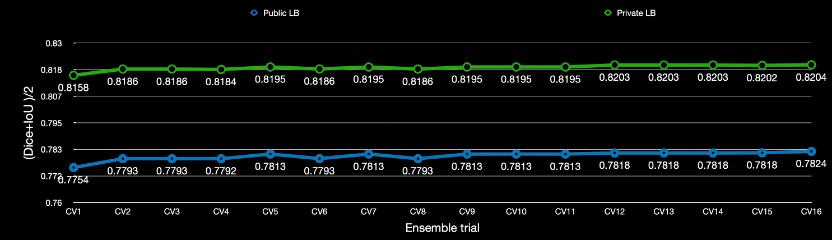
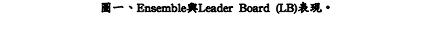